# Telecom Churn Case Study

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### Defining Churn

In this study, we will be using `Usage Based Churn`.Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

### High-value churn

In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce the churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

### Understanding customer behaviour during churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.


In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

In [1]:
# Importing required libraries

import pandas as pd, numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", 250)
pd.set_option("display.max_rows", 250)

In [3]:
# Loading the data

df = pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
df.shape

(99999, 226)

In [5]:
df.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
#Checking the data dictionary to understand the terms used

df_dict = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

df_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [7]:
# Missing values

round((df.isnull().sum()/df.shape[0])*100,2).sort_values(ascending= False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

In [8]:
# checking the unique values in each column

df.nunique().sort_values()

std_ic_t2o_mou_6                1
std_og_t2c_mou_8                1
std_og_t2c_mou_9                1
std_ic_t2o_mou_9                1
std_ic_t2o_mou_8                1
std_og_t2c_mou_7                1
std_ic_t2o_mou_7                1
last_date_of_month_9            1
std_og_t2c_mou_6                1
last_date_of_month_7            1
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_8            1
last_date_of_month_6            1
night_pck_user_7                2
night_pck_user_8                2
night_pck_user_9                2
night_pck_user_6                2
fb_user_9                       2
fb_user_8                       2
fb_user_7                       2
fb_user_6                       2
monthly_2g_9                    5
monthly_2g_6                    5
monthly_2g_7                    6
monthly_2g_8                    6
monthly_3g_9                   11
monthly_3g_6  

In [9]:
# Taking out the columns which has only 1 unique value.

unique_columns = []

for i in df.columns:
    if df[i].nunique() == 1:
        unique_columns.append(i)
    else:
        pass

print(unique_columns)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [10]:
# Dropping the columns with only one unique value as it wont have any statistical significance.

df.drop(unique_columns, axis=1, inplace= True)

#checking the shape after droping columns

df.shape

(99999, 210)

In [11]:
# columns with datetime format
date_columns = df.select_dtypes(include=[ 'object' ])

# Converting the selected columns to datetime format
for i in date_columns:
    df[i]=pd.to_datetime(df[i])

In [12]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   mobile_number             int64         
 1   arpu_6                    float64       
 2   arpu_7                    float64       
 3   arpu_8                    float64       
 4   arpu_9                    float64       
 5   onnet_mou_6               float64       
 6   onnet_mou_7               float64       
 7   onnet_mou_8               float64       
 8   onnet_mou_9               float64       
 9   offnet_mou_6              float64       
 10  offnet_mou_7              float64       
 11  offnet_mou_8              float64       
 12  offnet_mou_9              float64       
 13  roam_ic_mou_6             float64       
 14  roam_ic_mou_7             float64       
 15  roam_ic_mou_8             float64       
 16  roam_ic_mou_9             float64       
 17  roam_og_mou

### Handling Missing Values

In [13]:
# Checking the missing values of the existing columns
round((df.isnull().sum()/df.shape[0])*100,2).sort_values(ascending= False)

night_pck_user_6            74.85
arpu_2g_6                   74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
count_rech_2g_6             74.85
max_rech_data_6             74.85
fb_user_6                   74.85
date_of_last_rech_data_6    74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
night_pck_user_7            74.43
arpu_2g_7                   74.43
total_rech_data_7           74.43
arpu_3g_7                   74.43
max_rech_data_7             74.43
av_rech_amt_data_7          74.43
count_rech_3g_7             74.43
date_of_last_rech_data_7    74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
date_of_last_rech_data_9    74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
av_rech_amt_data_9          74.08
total_rech_data_9           74.08
arpu_3g_9                   74.08
count_rech_2g_9             74.08
night_pck_user

In [14]:
# Handling missing values of meaningful attributes
# Handling missing values in the recharge attributes of data

# Ch3ecking the values in the 6th month columns

df[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(10)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,2014-06-21,1.0,252.0
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2014-06-04,1.0,56.0
5,NaT,NaN,NaN
6,NaT,NaN,NaN
7,NaT,NaN,NaN
8,NaT,NaN,NaN
9,NaT,NaN,NaN


* Consider the column date of last recharge of data, if this has a missing value and `total_rech_data` and `max_rech_data` are also having missing values, then it can be considered as meaningful missing. This means that the customer has not done any reacharge for data. 
* This can be imputed with zero for all such cases in 6, 7,8 and 9 months. 

In [15]:
# Handling 'total_rech_data', 'max_rech_data' and for month 6, 7, 8, 9
# On conditions mentioned above the columns are imputed with 0

for i in range(len(df)):
    
   # month 6
    if pd.isnull((df['total_rech_data_6'][i]) and (df['max_rech_data_6'][i])):
        if pd.isnull(df['date_of_last_rech_data_6'][i]):
            df['total_rech_data_6'][i]=0
            df['max_rech_data_6'][i]=0

   # month 7
    if pd.isnull((df['total_rech_data_7'][i]) and (df['max_rech_data_7'][i])):
        if pd.isnull(df['date_of_last_rech_data_7'][i]):
            df['total_rech_data_7'][i]=0
            df['max_rech_data_7'][i]=0

  # month 8
    if pd.isnull((df['total_rech_data_8'][i]) and (df['max_rech_data_8'][i])):
        if pd.isnull(df['date_of_last_rech_data_8'][i]):
            df['total_rech_data_8'][i]=0
            df['max_rech_data_8'][i]=0

  # month 9
    if pd.isnull((df['total_rech_data_9'][i]) and (df['max_rech_data_9'][i])):
        if pd.isnull(df['date_of_last_rech_data_9'][i]):
            df['total_rech_data_9'][i]=0
            df['max_rech_data_9'][i]=0
            

In [16]:
# count_rech_2g and count_rech_3g columns in 6, 7, 8, 9 months
# checking the values in month 6 to understand it

df[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,1.0,0.0,1.0
5,NaN,NaN,0.0
6,NaN,NaN,0.0
7,NaN,NaN,0.0
8,NaN,NaN,0.0
9,NaN,NaN,0.0


* The `total_rech_data` column is the total of `count_rech_2g` and `count_rech_3g`. 
* This can lead to multicolinearity. So the columns `count_rech_2g` and `count_rech_3g` can be dropped from all the months i.e.6, 7, 8 and 9

In [17]:
# dropping the columns count_rech_2g` and `count_rech_3g from 6, 7,8 and 9 months

df.drop(['count_rech_2g_6','count_rech_3g_6',
                   'count_rech_2g_7','count_rech_3g_7',
                   'count_rech_2g_8','count_rech_3g_8',
                   'count_rech_2g_9','count_rech_3g_9'],axis=1, inplace=True)


In [18]:
# checking the dimensions after dropping columns

df.shape

(99999, 202)

In [19]:
# Handling the missing values in arpu_2g and arpu_3g for all the given months
# arpu - average revenue per user for 2g and 3g 
# We will compare it with average rech amount column

df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head()

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
0,212.17,212.17,252.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.00,0.00,56.0


In [20]:
# Checking the correlation 

print("Month 6\n\n", df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())

print("\nMonth 7\n\n", df[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nMonth 8\n\n", df[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())
print("\nMonth 9\n\n", df[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9']].corr())

Month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.932232            0.809695
arpu_2g_6            0.932232   1.000000            0.834065
av_rech_amt_data_6   0.809695   0.834065            1.000000

Month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000   0.930366            0.796131
arpu_2g_7            0.930366   1.000000            0.815933
av_rech_amt_data_7   0.796131   0.815933            1.000000

Month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.924925            0.787165
arpu_2g_8            0.924925   1.000000            0.805482
av_rech_amt_data_8   0.787165   0.805482            1.000000

Month 9

                     arpu_3g_9  arpu_2g_9  av_rech_amt_data_9
arpu_3g_9            1.000000   0.852253            0.722932
arpu_2g_9            0.852253   1.000000            0.817815
av_rech_amt_data_9   0.722932   0.817815  

* Since the arpu_36 and arpu-2g are highly coorelated to the average reacharge amount column in all the months, it is better to drop them.

In [21]:
# dropping columns arpu_2g and arpu_3g for all the months.

df.drop(['arpu_3g_6','arpu_2g_6', 'arpu_3g_7','arpu_2g_7', 'arpu_3g_8','arpu_2g_8', 'arpu_3g_9','arpu_2g_9'],axis=1, inplace=True)

In [22]:
# Looking at the shape of the dataset again

df.shape

(99999, 194)

In [23]:
# Checking the missing values of the existing columns once again

round((df.isnull().sum()/df.shape[0])*100,2).sort_values(ascending= False)

night_pck_user_6            74.85
av_rech_amt_data_6          74.85
fb_user_6                   74.85
date_of_last_rech_data_6    74.85
av_rech_amt_data_7          74.43
fb_user_7                   74.43
date_of_last_rech_data_7    74.43
night_pck_user_7            74.43
fb_user_9                   74.08
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
av_rech_amt_data_9          74.08
fb_user_8                   73.66
av_rech_amt_data_8          73.66
night_pck_user_8            73.66
date_of_last_rech_data_8    73.66
loc_ic_t2f_mou_9             7.75
loc_og_t2f_mou_9             7.75
loc_ic_mou_9                 7.75
std_ic_t2m_mou_9             7.75
loc_og_t2c_mou_9             7.75
loc_og_t2t_mou_9             7.75
loc_og_mou_9                 7.75
std_og_mou_9                 7.75
std_og_t2t_mou_9             7.75
std_ic_t2f_mou_9             7.75
std_og_t2m_mou_9             7.75
ic_others_9                  7.75
std_ic_mou_9                 7.75
isd_ic_mou_9  

* The columns `night_pck_user` and `fb_user` has more than 70% missing values and does not seem to have significance to the study being done. In this case, we can drop them.

In [24]:
# Dropping columns night_pck_user and fb_user from all the months

df.drop(['fb_user_6','fb_user_7','fb_user_8','fb_user_9', 'night_pck_user_6','night_pck_user_7','night_pck_user_8',
         'night_pck_user_9'],axis=1, inplace=True)

In [25]:
# Looking at the shape of the dataset again

df.shape

(99999, 186)

In [26]:
# Checking the missing values of the existing columns once again

round((df.isnull().sum()/df.shape[0])*100,2).sort_values(ascending= False)

av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
av_rech_amt_data_7          74.43
date_of_last_rech_data_7    74.43
av_rech_amt_data_9          74.08
date_of_last_rech_data_9    74.08
av_rech_amt_data_8          73.66
date_of_last_rech_data_8    73.66
loc_og_t2c_mou_9             7.75
loc_og_t2m_mou_9             7.75
loc_ic_t2f_mou_9             7.75
loc_ic_mou_9                 7.75
std_ic_t2t_mou_9             7.75
loc_og_t2t_mou_9             7.75
loc_og_mou_9                 7.75
std_ic_t2m_mou_9             7.75
std_og_t2t_mou_9             7.75
std_ic_t2f_mou_9             7.75
std_og_t2m_mou_9             7.75
ic_others_9                  7.75
std_ic_mou_9                 7.75
isd_ic_mou_9                 7.75
std_og_t2f_mou_9             7.75
spl_ic_mou_9                 7.75
std_og_mou_9                 7.75
loc_og_t2f_mou_9             7.75
roam_ic_mou_9                7.75
spl_og_mou_9                 7.75
loc_ic_t2m_mou_9             7.75
roam_og_mou_9 

* The columns `av_rech_amt_data` is the average recharge amount for each month. This has more than 70% missing values. 
* If we can compare this with the `max_rech_data` and `total_rech_data` columns for each month, we can know whether to drop or impute it. 



In [27]:
#Checking the av_rech_amt_data column with max_rech_data and total_rech_data of 8th month to understand it.

df[['av_rech_amt_data_8','max_rech_data_8','total_rech_data_8']].head(10)

,av_rech_amt_data_8,max_rech_data_8,total_rech_data_8
0,252.0,252.0,1.0
1,50.0,25.0,2.0
2,NaN,0.0,0.0
3,NaN,0.0,0.0
4,NaN,0.0,0.0
5,NaN,0.0,0.0
6,NaN,0.0,0.0
7,NaN,0.0,0.0
8,69.0,23.0,3.0
9,NaN,0.0,0.0


* We can obeserve that in the above table wherever the `total_rech_data` value is 0.0 the `av_rech_amt_data` is missing. This means when the total recharge amount is 0, the average will obiously be 0. Hence we can impute the av_rech_amt_data missing values with 0 on such conditions. 

In [28]:
# Conditonal imputation of the av_rech_amt column for all the months

for i in range(len(df)):
  # month 6
    if (pd.isnull(df['av_rech_amt_data_6'][i]) and (df['total_rech_data_6'][i]==0)):
        df['av_rech_amt_data_6'][i] = 0

  # month 7
    if (pd.isnull(df['av_rech_amt_data_7'][i]) and (df['total_rech_data_7'][i]==0)):
        df['av_rech_amt_data_7'][i] = 0

  # month 8
    if (pd.isnull(df['av_rech_amt_data_8'][i]) and (df['total_rech_data_8'][i]==0)):
        df['av_rech_amt_data_8'][i] = 0

  # month 9
    if (pd.isnull(df['av_rech_amt_data_9'][i]) and (df['total_rech_data_9'][i]==0)):
        df['av_rech_amt_data_9'][i] = 0

In [29]:
# Looking at the shape of the dataset again

df.shape

(99999, 186)

In [30]:
# Checking the missing values of the existing columns once again

round((df.isnull().sum()/df.shape[0])*100,2).sort_values(ascending= False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
std_ic_t2t_mou_9             7.75
loc_og_t2f_mou_9             7.75
std_ic_t2f_mou_9             7.75
loc_og_t2t_mou_9             7.75
std_ic_mou_9                 7.75
std_og_mou_9                 7.75
loc_og_t2m_mou_9             7.75
spl_ic_mou_9                 7.75
ic_others_9                  7.75
isd_ic_mou_9                 7.75
std_ic_t2m_mou_9             7.75
loc_og_t2c_mou_9             7.75
std_og_t2f_mou_9             7.75
std_og_t2m_mou_9             7.75
loc_og_mou_9                 7.75
roam_og_mou_9                7.75
std_og_t2t_mou_9             7.75
spl_og_mou_9                 7.75
loc_ic_mou_9                 7.75
loc_ic_t2m_mou_9             7.75
loc_ic_t2t_mou_9             7.75
loc_ic_t2f_mou_9             7.75
offnet_mou_9                 7.75
onnet_mou_9                  7.75
og_others_9                  7.75
roam_ic_mou_9 

* Columns `date_of_last_rech_data` and `date_of_last_rech_data_` will not have significane in the study, we can drop them for all the months

In [31]:
# Dropping columns date_of_last_rech_data for all months

df.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7",
          "date_of_last_rech_data_8","date_of_last_rech_data_9"], axis=1, inplace=True)

In [32]:
# Dropping columns date_of_last_rech_ for all months

df.drop(["date_of_last_rech_6","date_of_last_rech_7",
          "date_of_last_rech_8","date_of_last_rech_9"], axis=1, inplace=True)

In [33]:
# Looking at the shape of the dataset again

df.shape

(99999, 178)

In [34]:
# Checking the missing values of the existing columns once again

round((df.isnull().sum()/df.shape[0])*100,2).sort_values(ascending= False)

loc_ic_mou_9          7.75
spl_ic_mou_9          7.75
roam_og_mou_9         7.75
std_ic_t2f_mou_9      7.75
loc_og_t2t_mou_9      7.75
std_ic_mou_9          7.75
std_og_mou_9          7.75
loc_og_t2m_mou_9      7.75
loc_og_t2f_mou_9      7.75
std_ic_t2t_mou_9      7.75
isd_ic_mou_9          7.75
ic_others_9           7.75
loc_og_t2c_mou_9      7.75
std_og_t2f_mou_9      7.75
std_og_t2m_mou_9      7.75
loc_og_mou_9          7.75
std_ic_t2m_mou_9      7.75
std_og_t2t_mou_9      7.75
roam_ic_mou_9         7.75
offnet_mou_9          7.75
og_others_9           7.75
spl_og_mou_9          7.75
loc_ic_t2t_mou_9      7.75
loc_ic_t2m_mou_9      7.75
loc_ic_t2f_mou_9      7.75
onnet_mou_9           7.75
isd_og_mou_9          7.75
std_ic_mou_8          5.38
isd_og_mou_8          5.38
std_og_t2m_mou_8      5.38
og_others_8           5.38
std_ic_t2t_mou_8      5.38
std_og_t2f_mou_8      5.38
spl_og_mou_8          5.38
loc_ic_t2t_mou_8      5.38
ic_others_8           5.38
std_og_t2t_mou_8      5.38
l

In [35]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,

## Filtering High Value Customers

* This is taken from the good phase

In [36]:
# Checking the values in 'total_rech_data_ columns

df[['total_rech_data_6','total_rech_data_7','total_rech_data_8']]

,total_rech_data_6,total_rech_data_7,total_rech_data_8
0,1.0,1.0,1.0
1,0.0,1.0,2.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
99994,0.0,0.0,0.0
99995,0.0,0.0,0.0
99996,2.0,0.0,0.0
99997,3.0,2.0,4.0


In [37]:
# We find that the 'total_rech_data_' columns gives the number of recharges only and not the amount
# We can use this column to find the recharge amount for the data by multiplying this with the average-data recharge amount.

df['total_rech_amt_data_6']=df['av_rech_amt_data_6'] * df['total_rech_data_6']
df['total_rech_amt_data_7']=df['av_rech_amt_data_7'] * df['total_rech_data_7']


# Calculating the total amount of recharge

df['overall_rech_amt_6'] = df['total_rech_amt_data_6'] + df['total_rech_amt_6']
df['overall_rech_amt_7'] = df['total_rech_amt_data_7'] + df['total_rech_amt_7']

# Now calculating the average amount for months 6 and 7 (June and July)

df['avg_rech_amt_6_7'] = (df['overall_rech_amt_6'] + df['overall_rech_amt_7'])/2



In [38]:
# Creating the cut-off to taking out the high value customers 
# Cut-off is taken as >= 70th percentile recharge amount

rech_cutoff = df['avg_rech_amt_6_7'].quantile(0.70)

In [39]:
# Taking out the top 30% of customers i.e. High Value Customers

df1 = df[df['avg_rech_amt_6_7'] >= rech_cutoff]

In [40]:
#Checking the shape
df1.shape

(30001, 183)

### Imputing the columns with less missing values

In [41]:
# Checking the missing values of the existing columns once again

round((df1.isnull().sum()/df1.shape[0])*100,2).sort_values(ascending= False)

og_others_9              6.34
ic_others_9              6.34
std_ic_mou_9             6.34
spl_og_mou_9             6.34
loc_og_t2t_mou_9         6.34
spl_ic_mou_9             6.34
isd_ic_mou_9             6.34
loc_og_t2m_mou_9         6.34
isd_og_mou_9             6.34
roam_ic_mou_9            6.34
loc_og_t2f_mou_9         6.34
std_og_mou_9             6.34
std_og_t2f_mou_9         6.34
loc_og_t2c_mou_9         6.34
std_og_t2m_mou_9         6.34
loc_og_mou_9             6.34
std_ic_t2f_mou_9         6.34
roam_og_mou_9            6.34
std_og_t2t_mou_9         6.34
std_ic_t2m_mou_9         6.34
offnet_mou_9             6.34
std_ic_t2t_mou_9         6.34
loc_ic_t2t_mou_9         6.34
loc_ic_mou_9             6.34
loc_ic_t2m_mou_9         6.34
onnet_mou_9              6.34
loc_ic_t2f_mou_9         6.34
isd_og_mou_8             3.91
og_others_8              3.91
std_og_t2m_mou_8         3.91
loc_ic_t2t_mou_8         3.91
std_og_t2f_mou_8         3.91
loc_ic_t2m_mou_8         3.91
std_ic_t2f

In [42]:
# Lets check the stats for understanding it better

df1.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,30001.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000

In [43]:
# Selecting the numerical columns

num_columns = df1.select_dtypes(include = ['int64','float64']).columns.tolist()

* For imputing the rest of the missing values we could either go with mean or mode depending on the nature of data present in the columns using this code df[num_columns] = df[num_columns].fillna(df[num_columns].mean()[0]) or mode.

* Here we can use the KNNImputer for imputing the missing values for the columns as it is easy to implement. 

* `num_columns`contains all the numberical columns 

In [44]:
# Importing required Libraries

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [45]:
# Scaling 

scaling = MinMaxScaler()

In [46]:
# Scaling and transforming the data in the numerical columns

df1[num_columns] = scaling.fit_transform(df1[num_columns])

In [47]:
# KNN Imputer function

# We will go with default parameters in the function

knn = KNNImputer()


In [48]:
# Imputing the missing values using KNN imputer

df1_knn = pd.DataFrame(knn.fit_transform(df1[num_columns]))

df1_knn.columns =df1[num_columns].columns

In [49]:
df1_knn.isnull().sum()

mobile_number            0
arpu_6                   0
arpu_7                   0
arpu_8                   0
arpu_9                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
onnet_mou_9              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
offnet_mou_9             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_ic_mou_9            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
roam_og_mou_9            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2t_mou_9         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2m_mou_9         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2f_mou_9         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_t2c_mou_9         0
l

* The KNNImputer algorithm has imputed all the missing values

In [50]:
# Converting the scaled values back to original data

df1[num_columns] = scaling.inverse_transform(df1_knn)

df1.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
0,7.000843e+09,197.385,214.816,213.803,21.100,33.06,17.656,0.00,23.81,67.156,35.098,0.00,29.786,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.000,33.06,17.656,0.00,23.510,63.698,31.256,0.00,27.520,0.242,2.888,0.00,1.614,0.212,0.0,0.00,0.146,97.006,51.808,0.00,52.648,0.00,0.00,0.00,0.300,0.696,0.948,0.00,0.648,0.00,0.00,0.00,0.00,0.696,0.948,0.00,0.948,0.0,0.00,0.00,0.000,2.516,0.196,0.00,0.398,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,27.01,9.206,0.16,25.896,58.158,48.116,4.13,32.690,11.17,13.502,1.15,6.816,96.35,70.832,5.44,65.410,0.00,2.02,0.00,0.000,1.346,0.448,0.00,1.712,0.746,0.668,0.00,0.994,2.092,3.138,0.00,2.708,0.00,0.00,5.44,0.00,0.026,0.0,0.0,0.056,0.00,0.00,0.00,0.000,0.00,0.33,0.00,0.122,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680,52.29,51.56,453.430,567.160,325.91,146.168,16.23,33.49,31.64,2.866,23.74,12.59,38.06,4.726,51.39,31.380,40.28,38.422,308.630,447.380,162.28,101.986,62.130,55.140,53.23,3.482,0.000,0.0,0.00,0.000,422.160,533.910,255.79,143.896,4.30,2

In [51]:
df1.shape

(30001, 183)

## Churn Variable

* In this case we will be going by usage based churn model
* We will use the incoming, outgoing call minutes variables and 2g, 3g data consumption variables for calculating churn.

In [52]:
# Selecting the variables which will help in getting the churn variable (which is the target variable)

Churn_columns =['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']



In [53]:
# Based on the condition creating the churn column

df1['churn'] = 0

df1['churn'] = np.where(df1[Churn_columns].sum(axis=1) == 0, 1, 0)
        


In [54]:
df1.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
0,7.000843e+09,197.385,214.816,213.803,21.100,33.06,17.656,0.00,23.81,67.156,35.098,0.00,29.786,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.000,33.06,17.656,0.00,23.510,63.698,31.256,0.00,27.520,0.242,2.888,0.00,1.614,0.212,0.0,0.00,0.146,97.006,51.808,0.00,52.648,0.00,0.00,0.00,0.300,0.696,0.948,0.00,0.648,0.00,0.00,0.00,0.00,0.696,0.948,0.00,0.948,0.0,0.00,0.00,0.000,2.516,0.196,0.00,0.398,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,27.01,9.206,0.16,25.896,58.158,48.116,4.13,32.690,11.17,13.502,1.15,6.816,96.35,70.832,5.44,65.410,0.00,2.02,0.00,0.000,1.346,0.448,0.00,1.712,0.746,0.668,0.00,0.994,2.092,3.138,0.00,2.708,0.00,0.00,5.44,0.00,0.026,0.0,0.0,0.056,0.00,0.00,0.00,0.000,0.00,0.33,0.00,0.122,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0,1
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680,52.29,51.56,453.430,567.160,325.91,146.168,16.23,33.49,31.64,2.866,23.74,12.59,38.06,4.726,51.39,31.380,40.28,38.422,308.630,447.380,162.28,101.986,62.130,55.140,53.23,3.482,0.000,0.0,0.00,0.000,422.160,533.910,255.79,143.89

In [55]:
df1.shape

(30001, 184)

In [56]:
# Now we can drop all the ninth month columns as these are the churn phase columns

ninth_month_columns = [col for col in df1.columns if '_9' in col]

In [57]:
# Dropping all the ninth month columns

df1.drop(ninth_month_columns, axis=1, inplace=True)

In [58]:
# Lets check the shape again

df1.shape

(30001, 141)

In [59]:
# As few columns were derived (total_rech_amt_data_ and overall_rech_amt_ ) from some variables from 6 and 7 months, we can drop them 

df1.drop(['total_rech_amt_data_6','av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'total_rech_amt_data_7','av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

In [60]:
df1.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
0,7.000843e+09,197.385,214.816,213.803,33.06,17.656,0.00,67.156,35.098,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.06,17.656,0.00,63.698,31.256,0.00,0.242,2.888,0.00,0.212,0.0,0.00,97.006,51.808,0.00,0.00,0.00,0.00,0.696,0.948,0.00,0.00,0.00,0.00,0.696,0.948,0.00,0.0,0.00,0.00,2.516,0.196,0.00,0.0,0.0,0.0,0.00,0.00,0.00,27.01,9.206,0.16,58.158,48.116,4.13,11.17,13.502,1.15,96.35,70.832,5.44,0.00,2.02,0.00,1.346,0.448,0.00,0.746,0.668,0.00,2.092,3.138,0.00,0.00,0.00,5.44,0.026,0.0,0.0,0.00,0.00,0.00,0.00,0.33,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1
7,7.000702e+09,1069.180,1349.850,3171.480,57.84,54.680,52.29,453.430,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380,40.28,308.630,447.380,162.28,62.130,55.140,53.23,0.000,0.0,0.00,422.160,533.910,255.79,4.30,23.29,12.01,49.890,31.760,49.14,6.66,20.08,16.68,60.860,75.140,77.84,0.0,0.18,10.01,4.500,0.000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.260,27.31,217.560,221.490,121.19,152.16,101.460,39.53,427.88,355.230,188.04,36.89,11.83,30.39,91.440,126.990,141.33,52.190,34.240,22.21,180.540,173.080,193.94,626.46,558.04,428.74,0.210,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.00,1580.0,790.0,1185.0,1
8,7.001525e+09,378.721,492.223,137.362,413.69,351.030,35.08,94.660,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590,12.49,80.960,70.580,50.54,0.000,0.000,0.00,0.000,0.0,7.15,378.090,288.180,63.04,116.56,133.43,22.58,13.690,10.040,75.69,0.00,0.00,0.00,130.260,143.480,98.28,0.0,0.00,0.00,0.000,0.000,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.840,0.31,57.580,13.980,15.48,0.00,0.000,0.00,81.43,23.830,15.79,0.00,0.58,0.10,22.430,4.080,0.65,0.000,0.000,0.00,22.430,4.660,0.75,103.86,28.49,16.54,0.000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0

In [61]:
# A new Tenure column can be derived from the column 'aon' i.e. Age on network - number of days the customer is using the operator T network

df1[['aon']]

,aon
0,968.0
7,802.0
8,315.0
21,720.0
23,604.0
...,...
99981,473.0
99984,820.0
99986,2696.0
99988,328.0


In [62]:
# Creating a new column "Tenure" by dividing the 'aon' column with 30 -- to convert it to month

df1['tenure'] = (df1['aon']/30).round(0)

In [63]:
# As we derived a new column from 'aon', we can drop it 

df1.drop('aon',axis=1, inplace=True)

## EDA 

In [64]:
# Churn and non churn percentage

churn_nochurn_percent = (df1['churn'].value_counts()/len(df1))*100

churn_nochurn_percent

0    91.863605
1     8.136395
Name: churn, dtype: float64

* Around 92% of customers did not churn and only 8% customers churn. 

Text(0.5, 1.0, 'Chrun')

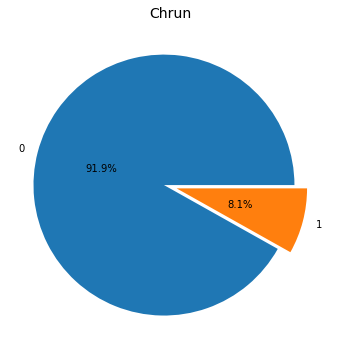

In [65]:
pie, ax = plt.subplots(figsize=[10,6])
labels = churn_nochurn_percent.keys()
plt.pie(x=churn_nochurn_percent, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Chrun", fontsize=14)

Average Tenure 40.31442285257158


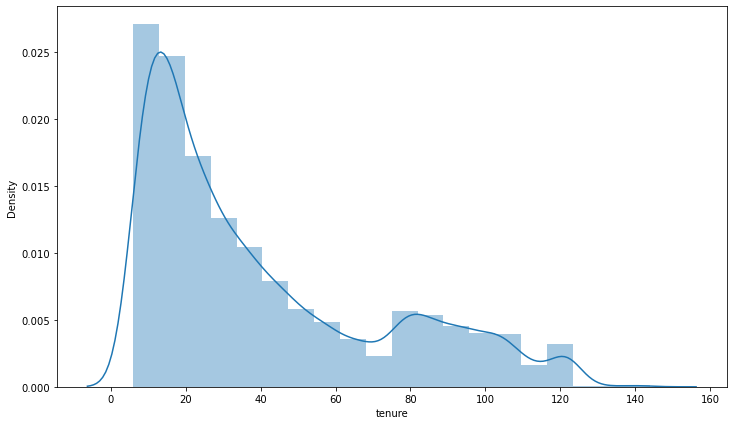

In [66]:
# Checking the distribution of the tenures of customers

print("Average Tenure", df1.tenure.mean())

plt.figure(figsize=[12,7])
sns.distplot(df1['tenure'],bins=20)
plt.show()

* The tenures tend to decrease after 20 months. 
* The average tenure is 40 months

In [67]:
# In the good phase (6 and 7) there are two columns diplaying the average revenue per user, we can take average of both 
df1["arpu_goodphase"]= (df1['arpu_6']+df1['arpu_7'])/2


In [68]:
df1[['arpu_goodphase']]

,arpu_goodphase
0,206.1005
7,1209.5150
8,435.4720
21,556.1030
23,134.1235
...,...
99981,319.8605
99984,265.7800
99986,550.1005
99988,412.7450


In [69]:
# Lets now drop the arpu 6 and 7 column as it is derived to a new column


df1.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

In [70]:
df1.shape

(30001, 132)

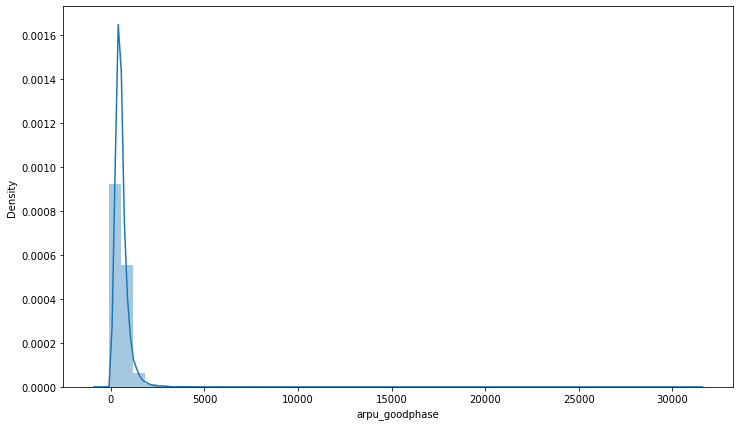

In [71]:
# Vizualising arpu_goodphase
plt.figure(figsize=[12,7])
sns.distplot(df1['arpu_goodphase'])
plt.show()

<Figure size 864x504 with 0 Axes>

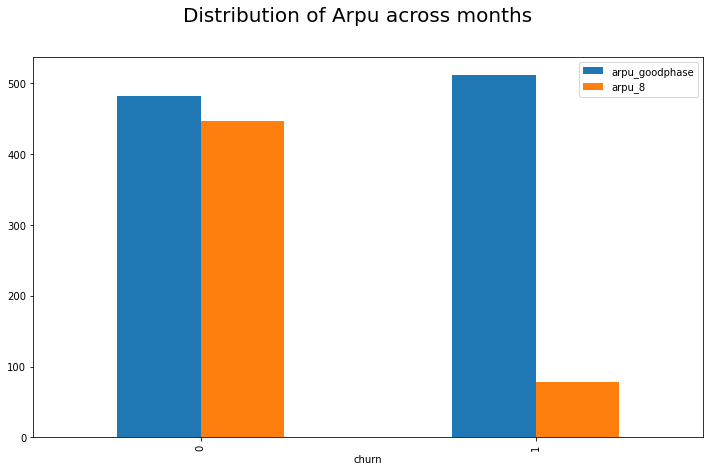

In [173]:
# Average revenue in goodphase and month 8
df_sample = df1.groupby(['churn'])['arpu_goodphase','arpu_8'].median()

df_sample.plot.bar(figsize=[12,7])
plt.suptitle('Distribution of Arpu across months', fontsize=20)
plt.show()

* Clearly the median of average revenue per month in the 8th month is reduced for those customers who had churned. 

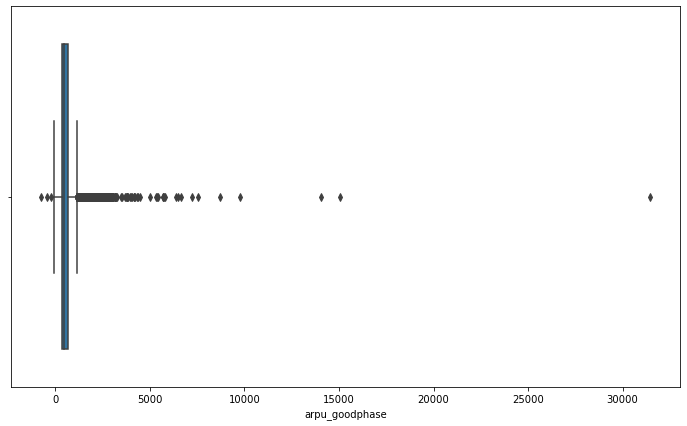

In [72]:
# Let's plot boxplot to check whether arpu_goodphase has outliers

plt.figure(figsize=[12,7])
sns.boxplot(df1['arpu_goodphase'])
plt.show()

* From the above two graphs, we can understand that the majority of average revenue per user in the goodphase lies some points below zero to around 3000. 

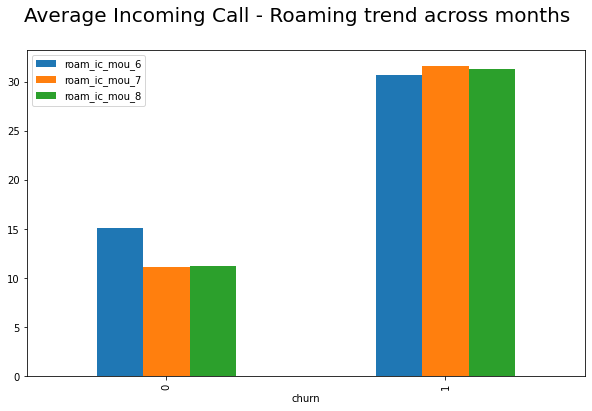

In [175]:
df_plt1 = df1.groupby(['churn'])['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'].mean()
df_plt1.plot.bar(figsize=[10,6])
plt.suptitle('Average Incoming Call - Roaming trend across months', fontsize=20)
plt.show()

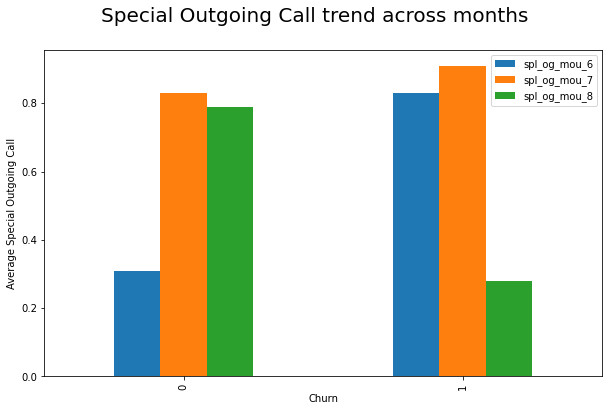

In [176]:
df_plt2= df1.groupby(['churn'])['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'].median()
df_plt2.plot.bar(figsize=[10,6])
plt.suptitle('Special Outgoing Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average Special Outgoing Call")
plt.show()

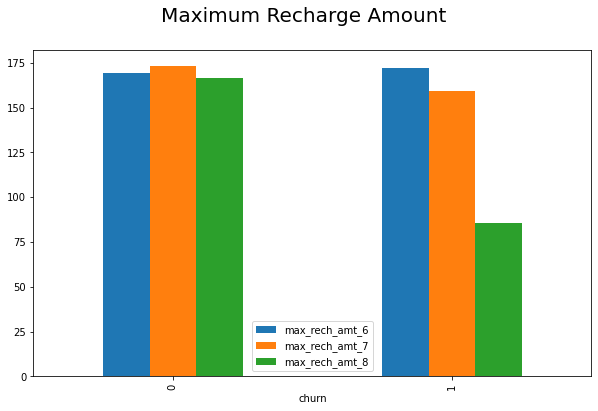

In [178]:
df_plt3 = df1.groupby(['churn'])['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'].mean()
df_plt3.plot.bar(figsize=[10,6])
plt.suptitle('Maximum Recharge Amount', fontsize=20)
plt.show()

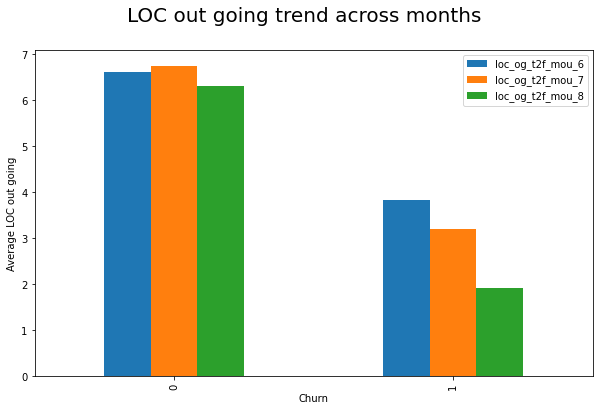

In [179]:
df_plt4 = df1.groupby(['churn'])['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8'].mean()
df_plt4.plot.bar(figsize=[10,6])
plt.suptitle('LOC out going trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average LOC out going")
plt.show()

* From the above four graphs, there is a clear trend that the outgoing calls are getting reduced, average recharge amount is reduced in the month of august (8) for those customers who churned. And incoming calls remains almost the same.

<AxesSubplot:xlabel='churn', ylabel='tenure'>

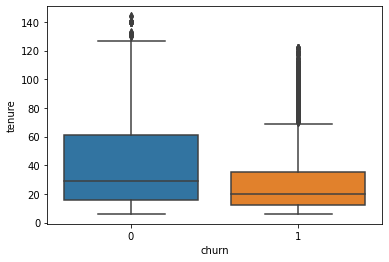

In [73]:
sns.boxplot(x='churn',y='tenure', data=df1)

* When the tenure is at the higher side, there is less churn. 

Text(0.5, 1.0, 'Correlation of features with Churn')

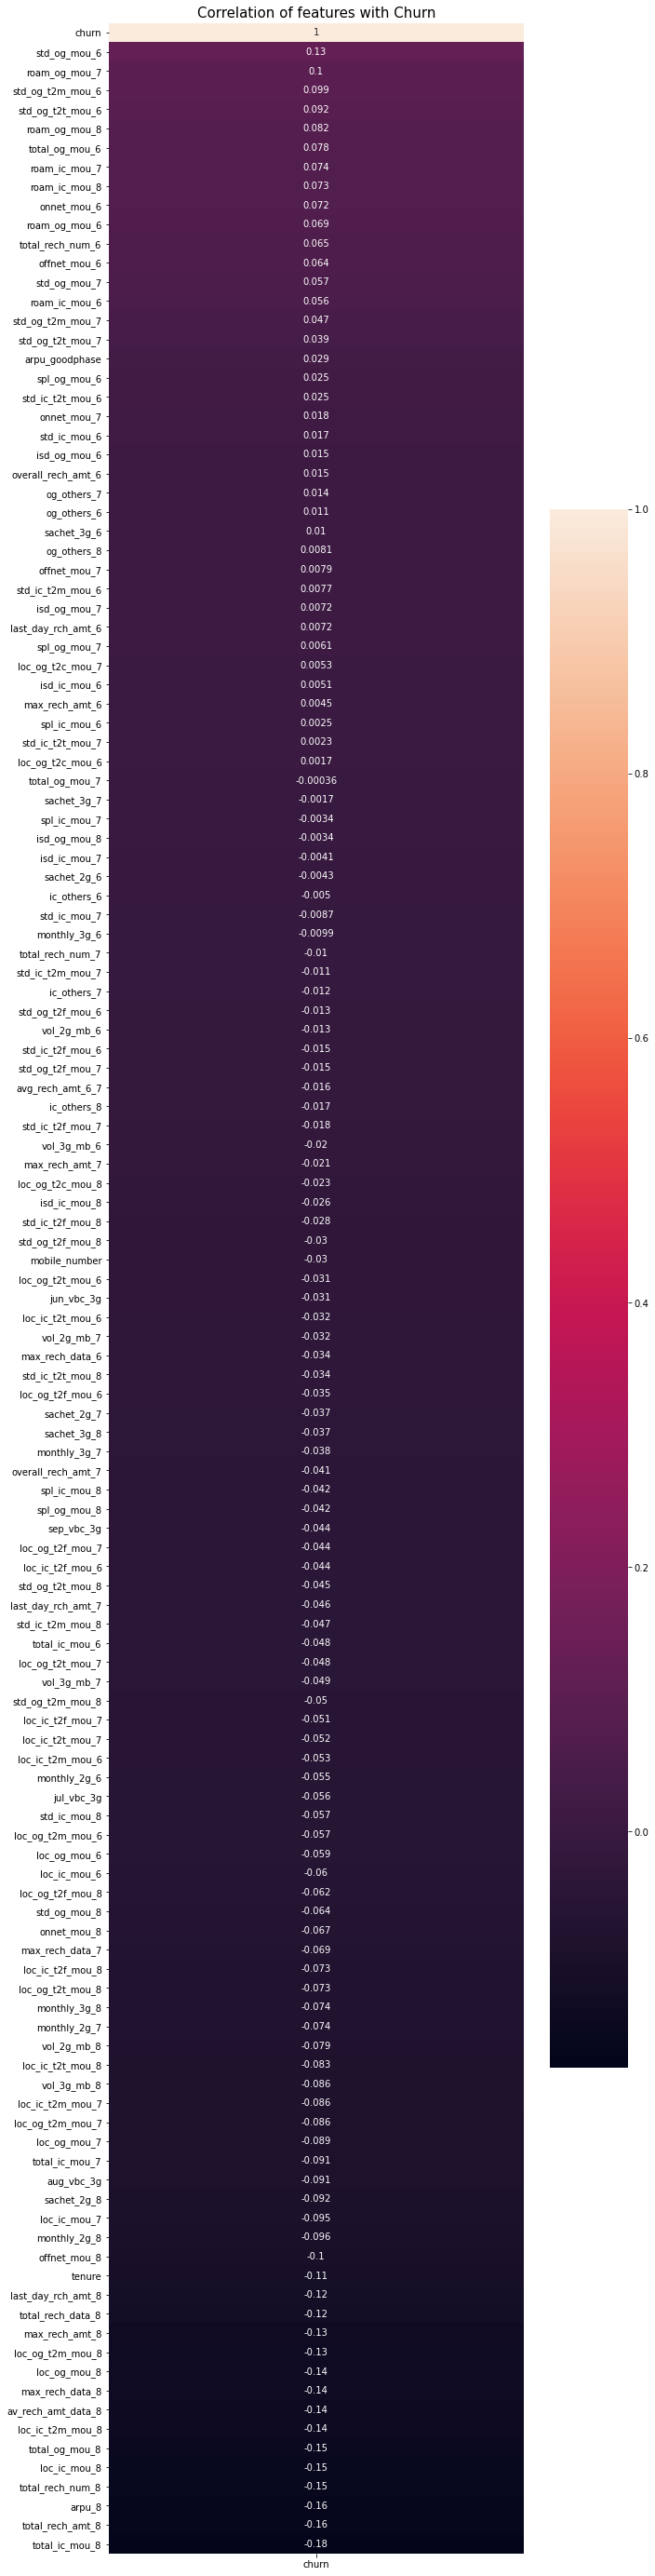

In [74]:
plt.figure(figsize=(10,50))

churn_corr = sns.heatmap(df1.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True)
churn_corr.set_title("Correlation of features with Churn", fontsize=15)

* No features are highly correlated with the Churn
* `std_og+mou_6` and `roam_og_mou_7` are the variables which are showing the higher positive correlation compared to others
* `total_rech_amt_8` and `total_ic_mou_8` are showing negative correlation compared with others

## Model Building

In [75]:
# Creating a copy of the dataset

df2 = df1[:].copy()

df2.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,tenure,arpu_goodphase
0,7.000843e+09,213.803,33.06,17.656,0.00,67.156,35.098,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.06,17.656,0.00,63.698,31.256,0.00,0.242,2.888,0.00,0.212,0.0,0.00,97.006,51.808,0.00,0.00,0.00,0.00,0.696,0.948,0.00,0.00,0.00,0.00,0.696,0.948,0.00,0.0,0.00,0.00,2.516,0.196,0.00,0.0,0.0,0.0,0.00,0.00,0.00,27.01,9.206,0.16,58.158,48.116,4.13,11.17,13.502,1.15,96.35,70.832,5.44,0.00,2.02,0.00,1.346,0.448,0.00,0.746,0.668,0.00,2.092,3.138,0.00,0.00,0.00,5.44,0.026,0.0,0.0,0.00,0.00,0.00,0.00,0.33,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1,32.0,206.1005
7,7.000702e+09,3171.480,57.84,54.680,52.29,453.430,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380,40.28,308.630,447.380,162.28,62.130,55.140,53.23,0.000,0.0,0.00,422.160,533.910,255.79,4.30,23.29,12.01,49.890,31.760,49.14,6.66,20.08,16.68,60.860,75.140,77.84,0.0,0.18,10.01,4.500,0.000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.260,27.31,217.560,221.490,121.19,152.16,101.460,39.53,427.88,355.230,188.04,36.89,11.83,30.39,91.440,126.990,141.33,52.190,34.240,22.21,180.540,173.080,193.94,626.46,558.04,428.74,0.210,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,0.00,1580.0,790.0,1185.0,1,27.0,1209.5150
8,7.001525e+09,137.362,413.69,351.030,35.08,94.660,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590,12.49,80.960,70.580,50.54,0.000,0.000,0.00,0.000,0.0,7.15,378.090,288.180,63.04,116.56,133.43,22.58,13.690,10.040,75.69,0.00,0.00,0.00,130.260,143.480,98.28,0.0,0.00,0.00,0.000,0.000,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.840,0.31,57.580,13.980,15.48,0.00,0.000,0.00,81.43,23.830,15.79,0.00,0.58,0.10,22.430,4.080,0.65,0.000,0.000,0.00,22.430,4.660,0.75,103.86,28.49,16.54,0.000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,120.0,90.0,154.0,3

In [76]:
#dropping columns which are not useful in this phase

df2.drop(["mobile_number", "sep_vbc_3g"], axis = 1, inplace = True)
df2.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,tenure,arpu_goodphase
0,213.803,33.06,17.656,0.00,67.156,35.098,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.06,17.656,0.00,63.698,31.256,0.00,0.242,2.888,0.00,0.212,0.0,0.00,97.006,51.808,0.00,0.00,0.00,0.00,0.696,0.948,0.00,0.00,0.00,0.00,0.696,0.948,0.00,0.0,0.00,0.00,2.516,0.196,0.00,0.0,0.0,0.0,0.00,0.00,0.00,27.01,9.206,0.16,58.158,48.116,4.13,11.17,13.502,1.15,96.35,70.832,5.44,0.00,2.02,0.00,1.346,0.448,0.00,0.746,0.668,0.00,2.092,3.138,0.00,0.00,0.00,5.44,0.026,0.0,0.0,0.00,0.00,0.00,0.00,0.33,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,614.0,504.0,559.0,1,32.0,206.1005
7,3171.480,57.84,54.680,52.29,453.430,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380,40.28,308.630,447.380,162.28,62.130,55.140,53.23,0.000,0.0,0.00,422.160,533.910,255.79,4.30,23.29,12.01,49.890,31.760,49.14,6.66,20.08,16.68,60.860,75.140,77.84,0.0,0.18,10.01,4.500,0.000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.260,27.31,217.560,221.490,121.19,152.16,101.460,39.53,427.88,355.230,188.04,36.89,11.83,30.39,91.440,126.990,141.33,52.190,34.240,22.21,180.540,173.080,193.94,626.46,558.04,428.74,0.210,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1,27.0,1209.5150
8,137.362,413.69,351.030,35.08,94.660,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590,12.49,80.960,70.580,50.54,0.000,0.000,0.00,0.000,0.0,7.15,378.090,288.180,63.04,116.56,133.43,22.58,13.690,10.040,75.69,0.00,0.00,0.00,130.260,143.480,98.28,0.0,0.00,0.00,0.000,0.000,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.840,0.31,57.580,13.980,15.48,0.00,0.000,0.00,81.43,23.830,15.79,0.00,0.58,0.10,22.430,4.080,0.65,0.000,0.000,0.00,22.430,4.660,0.75,103.86,28.49,16.54,0.000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,3.0,0.0,154.0,23.0,69.0,0.00,356.00,0.03,0.00,750.95,11.

In [77]:
# Creating x and y datasets

x = df2.drop(['churn'], axis=1)
y = df2['churn']



In [78]:
# Dividing into train and text sets

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 4, stratify = y)

In [79]:
print(X_train.shape)
print(X_test.shape)

(22500, 129)
(7501, 129)


In [80]:
# selecting the numerical columns

num_columns = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [81]:
# Applying scaling to the dataset

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])

In [82]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,tenure,arpu_goodphase
14920,0.032729,0.000561,0.000000,0.000000,0.000587,0.000017,0.001104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000059,0.000000,0.000000,0.000203,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.0,0.0,0.000216,0.000000,0.000000,0.000509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000485,0.000000,0.000000,0.0,0.0,0.0,0.003059,0.000126,0.016197,0.000000,0.0,0.0,0.001084,0.000014,0.001101,0.000549,0.000366,0.000524,0.008357,0.004171,0.001675,0.000000,0.000000,0.000000,0.004813,0.003197,0.001787,0.003161,0.000119,0.006994,0.000121,0.001251,0.000046,0.000000,0.000000,0.000000,0.003266,0.000747,0.005105,0.006961,0.003109,0.006575,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019544,0.000000,0.015306,0.004744,0.049377,0.000000,0.044504,0.049377,0.000000,0.003821,0.033333,0.127331,0.000000,0.127331,0.052943,0.186297,0.000000,0.261067,0.00000,0.000000,0.0000,0.25,0.0,0.2,0.071429,0.0,0.022727,0.000000,0.000,0.000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.021083,0.000000,0.003540,0.101449,0.026756
41479,0.029228,0.000776,0.001511,0.000000,0.005668,0.001204,0.002694,0.000000,0.010277,0.000000,0.000000,0.000608,0.000000,0.000801,0.001564,0.000000,0.003738,0.000599,0.005017,0.001035,0.0,0.000355,0.0000,0.0,0.0,0.003780,0.001862,0.003293,0.000080,0.000000,0.000000,0.002283,0.000774,0.000897,0.010166,0.0,0.0,0.002947,0.000657,0.000895,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.006064,0.001859,0.002687,0.002762,0.000039,0.002457,0.018534,0.008954,0.004082,0.003336,0.001349,0.000743,0.012602,0.006526,0.005459,0.001083,0.000069,0.028336,0.013367,0.009656,0.002853,0.016720,0.000863,0.030382,0.016560,0.005172,0.030318,0.030895,0.011310,0.045518,0.0,0.0,0.0,0.012871,0.000000,0.018801,0.019708,0.008249,0.001661,0.016287,0.036232,0.030612,0.000000,0.021446,0.027431,0.000000,0.000000,0.000000,0.000000,0.033333,0.162058,0.162058,0.162058,0.124107,0.000935,0.008281,0.002797,0.04523,0.070445,0.1028,0.00,0.0,0.0,0.000000,0.0,0.000000,0.142857,0.125,0.125,0.0,0.0,0.0,0.074013,0.176023,0.065859,0.018906,0.019938,0.016843,0.036232,0.02

In [83]:
print(y_train.value_counts())
y_train.value_counts(normalize = True).reset_index()

0    20669
1     1831
Name: churn, dtype: int64


,index,churn
0,0,0.918622
1,1,0.081378


## Handling Imbalance

In [84]:
# Using the SMOTE method

from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)
X_train_smt,y_train_smt = smt.fit_resample(X_train,y_train)

In [85]:
print(X_train_smt.shape)
print(y_train_smt.shape)

(41338, 129)
(41338,)


In [86]:
print(y_train_smt.value_counts())
y_train_smt.value_counts(normalize = True).reset_index()

1    20669
0    20669
Name: churn, dtype: int64


,index,churn
0,1,0.5
1,0,0.5


## Logistic Regression

In [87]:
# Importing libraries for Model creation

import statsmodels.api as sm

In [88]:
# Logistic Regression model using statsmodel

logm1 = sm.GLM(y_train_smt,(sm.add_constant(X_train_smt)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41210
Model Family:                Binomial   Df Model:                          127
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 04 Sep 2021   Deviance:                          nan
Time:                        23:40:49   Pearson chi2:                 1.29e+08
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3563      0.202     -6.704      0.000      -1.753      -0.960
arpu_8                73.1946      6.125     11.951      0.000      61.190      85.199
onnet_mou_6          -88.2829     25.028     -3.527      0.000    -137.338     -39.228
onnet_mou_7          -39.4579     21.500     -1.835      0.066     -81.597       2.681
onnet_mou_8           90.1473     25.769      3.498      0.000      39.642     140.653
offnet_mou_6         -77.2206     24.589     -3.140      0.002    -125.414     -29.027
offnet_mou_7         -77.6236     27.404     -2.833      0.005    -131.335     -23.912
offnet_mou_8         142.3134     49.612      2.869      0.004      45.077     239.550
roam_ic_mou_6          1.6955      0.813      2.086      0.037       0.103       3.288
roam_ic_mou_7          5.0465      1.281      3.940      0.000       2.536       7.557
roam_ic_mou_8         -3.5213      1.085     -3.246      0.001      -5.648      -1.395
roam_og_mou_6         43.9010     13.378      3.282      0.001      17.681      70.121
roam_og_mou_7         21.8798      8.017      2.729      0.006       6.167      37.593
roam_og_mou_8        -52.8522     18.977     -2.785      0.005     -90.047     -15.657
loc_og_t2t_mou_6    6.719e+04   1.85e+04      3.625      0.000    3.09e+04    1.04e+05
loc_og_t2t_mou_7    -1.93e+04   2.16e+04     -0.895      0.371   -6.16e+04     2.3e+04
loc_og_t2t_mou_8    1.877e+05   2.21e+04      8.499      0.000    1.44e+05    2.31e+05
loc_og_t2m_mou_6    5.214e+04   1.44e+04      3.624      0.000    2.39e+04    8.03e+04
loc_og_t2m_mou_7   -1.227e+04   1.37e+04     -0.894      0.371   -3.92e+04    1.46e+04
loc_og_t2m_mou_8    1.329e+05   1.56e+04      8.499      0.000    1.02e+05    1.64e+05
loc_og_t2f_mou_6    7458.3072   2058.049      3.624      0.000    3424.606    1.15e+04
loc_og_t2f_mou_7   -2857.2910   3186.468     -0.897      0.370   -9102.654    3388.072
loc_og_t2f_mou_8    2.487e+04   2925.874      8.500      0.000    1.91e+04    3.06e+04
loc_og_t2c_mou_6      -4.2787      1.030     -4.154      0.000      -6.297      -2.260
loc_og_t2c_mou_7       1.9791      1.643      1.204      0.228      -1.242       5.200
loc_og_t2c_mou_8       1.6825      1.126      1.494      0.135      -0.525       3.890
loc_og_mou_6       -6.775e+04   1.87e+04     -3.619      0.000   -1.04e+05   -3.11e+04
loc_og_mou_7        2.025e+04   2.25e+04      0.898      0.369   -2.39e+04    6.44e+04
loc_og_mou_8       -2.052e+05   2.41e+04     -8.500      0.000   -2.53e+05   -1.58e+05
std_og_t2t_mou_6    5976.7713   2.59e+04      0.231      0.818   -4.48e+04    5.68e+04
std_og_t2t_mou_7   -8.926e+04   2.77e+04     -3.218      0.001   -1.44e+05   -3.49e+04
std_og_t2t_mou_8     1.68e+05   2.75e+04      6.099      0.000    1.14e+05    2.22e+05
std_og_t2m_mou_6    5490.6562   2.39e+

In [89]:
# Lets use RFE -feature selection 

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 18 variables as output

rfe = RFE(logreg, 18)             
rfe = rfe.fit(X_train_smt, y_train_smt)

In [90]:
rfe.support_

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,

In [91]:
rfe_columns=X_train_smt.columns[rfe.support_]

In [92]:
list(zip(X_train_smt.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 23),
 ('onnet_mou_6', False, 30),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 46),
 ('offnet_mou_6', False, 29),
 ('offnet_mou_7', False, 33),
 ('offnet_mou_8', False, 9),
 ('roam_ic_mou_6', False, 18),
 ('roam_ic_mou_7', False, 58),
 ('roam_ic_mou_8', False, 96),
 ('roam_og_mou_6', False, 105),
 ('roam_og_mou_7', False, 3),
 ('roam_og_mou_8', False, 8),
 ('loc_og_t2t_mou_6', False, 75),
 ('loc_og_t2t_mou_7', False, 64),
 ('loc_og_t2t_mou_8', False, 48),
 ('loc_og_t2m_mou_6', False, 95),
 ('loc_og_t2m_mou_7', False, 83),
 ('loc_og_t2m_mou_8', False, 24),
 ('loc_og_t2f_mou_6', False, 13),
 ('loc_og_t2f_mou_7', False, 26),
 ('loc_og_t2f_mou_8', False, 72),
 ('loc_og_t2c_mou_6', False, 25),
 ('loc_og_t2c_mou_7', False, 99),
 ('loc_og_t2c_mou_8', False, 106),
 ('loc_og_mou_6', False, 57),
 ('loc_og_mou_7', False, 49),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 63),
 ('std_og_t2t_mou_7', False, 111),
 ('std_og_t2t_mou_8', False, 74),
 ('std_og_t2m_mou

In [93]:
# Assessing the model

X_train_SM = sm.add_constant(X_train_smt[rfe_columns])
logm2 = sm.GLM(y_train_smt,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41319
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16708.
Date:                Sat, 04 Sep 2021   Deviance:                       33416.
Time:                        23:42:13   Pearson chi2:                 4.39e+12
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3430      0.062      5.539      0.000       0.222       0.464
onnet_mou_7            3.9910      0.310     12.858      0.000       3.383       4.599
loc_og_mou_8          -7.8144      0.811     -9.639      0.000      -9.403      -6.225
total_og_mou_8       -14.0164      0.635    -22.071      0.000     -15.261     -12.772
loc_ic_t2m_mou_7      10.1071      0.705     14.337      0.000       8.725      11.489
loc_ic_t2m_mou_8       3.4379      1.710      2.011      0.044       0.087       6.788
std_ic_mou_6          14.4603      1.002     14.427      0.000      12.496      16.425
total_ic_mou_8       -43.6853      1.347    -32.438      0.000     -46.325     -41.046
spl_ic_mou_8         -12.3179      1.259     -9.787      0.000     -14.785      -9.851
total_rech_num_6       3.9178      0.614      6.382      0.000       2.715       5.121
total_rech_num_8     -11.5524      0.597    -19.340      0.000     -12.723     -10.382
last_day_rch_amt_8   -14.4601      0.677    -21.361      0.000     -15.787     -13.133
total_rech_data_8    -14.1002      1.780     -7.921      0.000     -17.589     -10.611
vol_2g_mb_8           -9.8293      1.140     -8.623      0.000     -12.063      -7.595
monthly_2g_8          -6.9439      0.374    -18.587      0.000      -7.676      -6.212
sachet_2g_8           -1.9445      1.441     -1.349      0.177      -4.770       0.881
monthly_3g_8          -7.1021      0.778     -9.125      0.000      -8.628      -5.577
aug_vbc_3g            -7.8876      0.866     -9.112      0.000      -9.584      -6.191
arpu_goodphase        37.5526      1.777     21.127      0.000      34.069      41.036
======================================================================================
"""

In [94]:
# From the P-values of variables the 'sachet_2g_8' has 0.177 p value, we can drop it. 

rfe_columns_1=rfe_columns.drop('sachet_2g_8',1)

In [95]:
# Training the model with the edited feature list

X_train_SM = sm.add_constant(X_train_smt[rfe_columns_1])
logm2 = sm.GLM(y_train_smt,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41320
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16709.
Date:                Sat, 04 Sep 2021   Deviance:                       33418.
Time:                        23:42:13   Pearson chi2:                 4.75e+12
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3408      0.062      5.501      0.000       0.219       0.462
onnet_mou_7            3.9836      0.310     12.836      0.000       3.375       4.592
loc_og_mou_8          -7.8311      0.811     -9.657      0.000      -9.421      -6.242
total_og_mou_8       -14.0235      0.635    -22.083      0.000     -15.268     -12.779
loc_ic_t2m_mou_7      10.0881      0.704     14.321      0.000       8.707      11.469
loc_ic_t2m_mou_8       3.4337      1.709      2.009      0.045       0.084       6.783
std_ic_mou_6          14.4301      1.001     14.414      0.000      12.468      16.392
total_ic_mou_8       -43.6624      1.346    -32.432      0.000     -46.301     -41.024
spl_ic_mou_8         -12.3189      1.259     -9.787      0.000     -14.786      -9.852
total_rech_num_6       3.9225      0.614      6.388      0.000       2.719       5.126
total_rech_num_8     -11.5654      0.597    -19.360      0.000     -12.736     -10.395
last_day_rch_amt_8   -14.4375      0.676    -21.350      0.000     -15.763     -13.112
total_rech_data_8    -16.3443      0.673    -24.279      0.000     -17.664     -15.025
vol_2g_mb_8           -9.9140      1.140     -8.698      0.000     -12.148      -7.680
monthly_2g_8          -6.7544      0.346    -19.506      0.000      -7.433      -6.076
monthly_3g_8          -6.5017      0.641    -10.150      0.000      -7.757      -5.246
aug_vbc_3g            -7.8182      0.863     -9.055      0.000      -9.510      -6.126
arpu_goodphase        37.6341      1.777     21.173      0.000      34.150      41.118
======================================================================================
"""

In [96]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smt[rfe_columns_1].columns
vif['VIF'] = [variance_inflation_factor(X_train_smt[rfe_columns_1].values, i) for i in range(X_train_smt[rfe_columns_1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_ic_t2m_mou_8,5.86
16,arpu_goodphase,5.09
6,total_ic_mou_8,4.44
9,total_rech_num_8,3.85
8,total_rech_num_6,3.85
3,loc_ic_t2m_mou_7,3.53
2,total_og_mou_8,3.32
1,loc_og_mou_8,2.27
0,onnet_mou_7,1.94
11,total_rech_data_8,1.69


In [98]:
# Dropping 'loc_ic_t2m_mou_8' column as it has hight VIF and comparetively high p value

rfe_columns_2=rfe_columns_1.drop('loc_ic_t2m_mou_8',1)

In [99]:
# Training the model with the edited feature list

X_train_SM = sm.add_constant(X_train_smt[rfe_columns_2])
logm2 = sm.GLM(y_train_smt,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41321
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16711.
Date:                Sat, 04 Sep 2021   Deviance:                       33422.
Time:                        23:42:15   Pearson chi2:                 3.85e+12
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3583      0.061      5.864      0.000       0.239       0.478
onnet_mou_7            3.9530      0.310     12.765      0.000       3.346       4.560
loc_og_mou_8          -7.5258      0.793     -9.490      0.000      -9.080      -5.972
total_og_mou_8       -14.0568      0.635    -22.140      0.000     -15.301     -12.812
loc_ic_t2m_mou_7      10.8314      0.606     17.863      0.000       9.643      12.020
std_ic_mou_6          13.8579      0.956     14.495      0.000      11.984      15.732
total_ic_mou_8       -41.8986      1.006    -41.653      0.000     -43.870     -39.927
spl_ic_mou_8         -12.2915      1.258     -9.772      0.000     -14.757      -9.826
total_rech_num_6       3.9765      0.614      6.477      0.000       2.773       5.180
total_rech_num_8     -11.6114      0.598    -19.432      0.000     -12.783     -10.440
last_day_rch_amt_8   -14.4228      0.676    -21.342      0.000     -15.747     -13.098
total_rech_data_8    -16.3523      0.674    -24.266      0.000     -17.673     -15.032
vol_2g_mb_8           -9.9210      1.141     -8.698      0.000     -12.157      -7.685
monthly_2g_8          -6.7634      0.346    -19.522      0.000      -7.442      -6.084
monthly_3g_8          -6.4509      0.640    -10.085      0.000      -7.705      -5.197
aug_vbc_3g            -7.8406      0.864     -9.076      0.000      -9.534      -6.147
arpu_goodphase        37.2487      1.760     21.169      0.000      33.800      40.697
======================================================================================
"""

In [100]:
# Checking VIF again

vif = pd.DataFrame()
vif['Features'] = X_train_smt[rfe_columns_2].columns
vif['VIF'] = [variance_inflation_factor(X_train_smt[rfe_columns_2].values, i) for i in range(X_train_smt[rfe_columns_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,arpu_goodphase,5.09
7,total_rech_num_6,3.85
8,total_rech_num_8,3.85
2,total_og_mou_8,3.32
5,total_ic_mou_8,2.86
3,loc_ic_t2m_mou_7,2.37
1,loc_og_mou_8,2.23
0,onnet_mou_7,1.93
10,total_rech_data_8,1.69
14,aug_vbc_3g,1.59


In [101]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_SM)
y_train_pred[:10]

0    0.029641
1    0.072200
2    0.948366
3    0.311143
4    0.000218
5    0.007465
6    0.063943
7    0.000026
8    0.767644
9    0.318757
dtype: float64

In [102]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.96412241e-02, 7.21997702e-02, 9.48365787e-01, 3.11143325e-01,
       2.17509195e-04, 7.46534670e-03, 6.39427988e-02, 2.57144454e-05,
       7.67643938e-01, 3.18756888e-01])

In [103]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_smt.values, 'Converted_prob':y_train_pred})

y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.029641
1,0,0.072200
2,1,0.948366
3,0,0.311143
4,0,0.000218


In [104]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

# prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.029641,0
1,0,0.072200,0
2,1,0.948366,1
3,0,0.311143,0
4,0,0.000218,0


In [105]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[15355  5314]
 [ 2129 18540]]


### Confusion matrix

| Predicted/Actual | not_churn | churn |
|:- | :- | :- |
|not_churn | 15355  | 5314 |
|churn      | 2129   | 18540 |

In [106]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred)

0.8199477478349219

In [107]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [108]:
# Let's see the sensitivity of our logistic regression model

print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8969955005080071
Specificity =  0.7428999951618366
False Positive Rate =  0.2571000048381634
Precision =  0.7772281378385176
True Negative Prediction Rate =  0.878231525966598


In [109]:
# Defining a function to plot the roc curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [110]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )


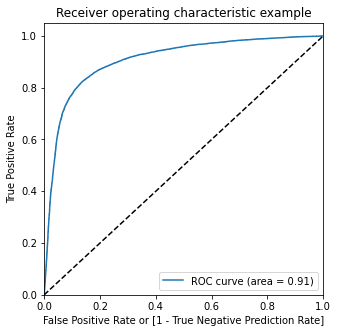

In [111]:
# Plotting the ROC curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

In [112]:
# Finding Optimal cutoff

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.029641,0,1,0,0,0,0,0,0,0,0,0
1,0,0.072200,0,1,0,0,0,0,0,0,0,0,0
2,1,0.948366,1,1,1,1,1,1,1,1,1,1,1
3,0,0.311143,0,1,1,1,1,0,0,0,0,0,0
4,0,0.000218,0,1,0,0,0,0,0,0,0,0,0


In [113]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.689632     0.971600     0.407664
0.2          0.2  0.752867     0.948377     0.557356
0.3          0.3  0.794475     0.926557     0.662393
0.4          0.4  0.819948     0.896996     0.742900
0.5          0.5  0.838284     0.862112     0.814456
0.6          0.6  0.843026     0.814021     0.872031
0.7          0.7  0.830761     0.744206     0.917316
0.8          0.8  0.779017     0.603706     0.954328
0.9          0.9  0.612778     0.239296     0.986260


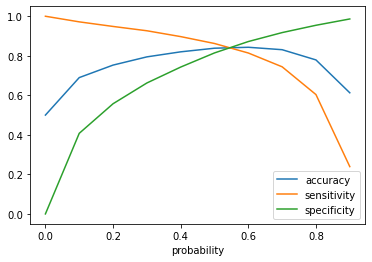

In [114]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

* Initially we had taken cutoff to be 0.4 and the above graph is showing optimum cutoff to be above 0.5 and below 0.6.

In [115]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.029641,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.072200,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0.948366,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.311143,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.000218,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [116]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.838284     0.862112     0.814456
0.51         0.51  0.839446     0.858435     0.820456
0.52         0.52  0.839687     0.853017     0.826358
0.53         0.53  0.840679     0.848033     0.833325
0.54         0.54  0.840970     0.843631     0.838309
0.55         0.55  0.841647     0.838938     0.844356
0.56         0.56  0.842518     0.833809     0.851226
0.57         0.57  0.842881     0.828439     0.857323
0.58         0.58  0.843244     0.823794     0.862693
0.59         0.59  0.843244     0.819198     0.867289


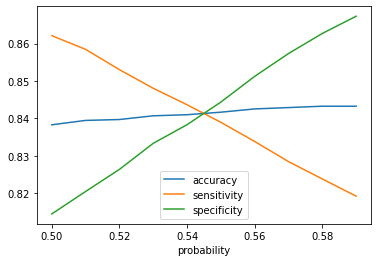

In [117]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

* From the  graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.55



In [118]:
# From the curve above, 0.55 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.55 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.029641,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.072200,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0.948366,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.311143,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.000218,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [119]:
# Calculating the ovearall accuracy again

metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred)

0.841646910832648

In [120]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[17452  3217]
 [ 3329 17340]]


In [121]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8389375393100779
Specificity =  0.844356282355218
False Positive Rate =  0.15564371764478205
Precision =  0.8435082940117722
True Negative Prediction Rate =  0.8398055916462153


### Precision and recall tradeoff


In [122]:
from sklearn.metrics import precision_recall_curve


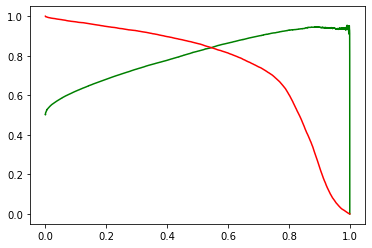

In [123]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [124]:
# Scaling the test data
X_test[num_columns] = scaler.transform(X_test[num_columns])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,tenure,arpu_goodphase
55328,0.046455,0.000000,0.001074,0.000000,0.000000,0.011408,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.001111,0.000000,0.000000,0.024199,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.015801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.010404,0.000000,0.000000,0.001887,0.000000,0.000408,0.061196,0.001208,0.0,0.000179,0.000101,0.000212,0.043819,0.001035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000205,0.033315,0.000905,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.022801,0.072464,0.015306,0.016681,0.062843,0.062843,0.056642,0.062843,0.000000,0.056642,0.05,0.162058,0.162058,0.162058,0.186161,0.001785,0.006578,0.002816,0.163451,0.159254,0.092118,0.0,0.0,0.0,0.0,0.00000,0.0,0.428571,0.3750,0.1875,0.0,0.0,0.0,0.160223,0.217613,0.412013,0.178550,0.173625,0.256300,0.094203,0.049051
33669,0.044771,0.075774,0.067489,0.068323,0.009290,0.007710,0.005207,0.0,0.0,0.0,0.00000,0.0,0.0,0.00085,0.000332,0.000211,0.006859,0.007687,0.008804,0.0,0.0,0.0,0.0,0.001545,0.000000,0.006115,0.004999,0.005895,0.075287,0.067879,0.073378,0.005012,0.004158,0.002097,0.0,0.0,0.0,0.076036,0.049045,0.037051,0.0,0.0,0.0,0.000000,0.000695,0.000000,0.000000,0.0,0.0,0.080469,0.050565,0.040101,0.000235,0.000079,0.000554,0.008861,0.009054,0.015591,0.0,0.000000,0.000000,0.004806,0.006296,0.013381,0.003348,0.003274,0.004929,0.004704,0.005458,0.000838,0.0,0.0,0.0,0.007337,0.005624,0.004361,0.009913,0.009926,0.015986,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000439,0.000201,0.0,0.013029,0.014493,0.015306,0.013173,0.074813,0.087282,0.089908,0.029925,0.087282,0.029220,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.010144,0.006884,0.000228,0.268116,0.035274
62394,0.042529,0.136566,0.114743,0.149345,0.001090,0.002716,0.001079,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.

In [125]:
# Feature selection
X_test_loregg=X_test[rfe_columns_2]
X_test_loregg.head()

,onnet_mou_7,loc_og_mou_8,total_og_mou_8,loc_ic_t2m_mou_7,std_ic_mou_6,total_ic_mou_8,spl_ic_mou_8,total_rech_num_6,total_rech_num_8,last_day_rch_amt_8,total_rech_data_8,vol_2g_mb_8,monthly_2g_8,monthly_3g_8,aug_vbc_3g,arpu_goodphase
55328,0.001074,0.000000,0.000000,0.061196,0.000000,0.000905,0.0,0.022801,0.015306,0.056642,0.05,0.002816,0.0,0.1875,0.160223,0.049051
33669,0.067489,0.005895,0.040101,0.009054,0.007337,0.015986,0.0,0.013029,0.015306,0.029220,0.00,0.000000,0.0,0.0000,0.000000,0.035274
62394,0.114743,0.000183,0.077377,0.000529,0.003559,0.005281,0.0,0.016287,0.025510,0.000000,0.00,0.000000,0.0,0.0000,0.000000,0.034930
36441,0.000000,0.000093,0.001318,0.000966,0.000000,0.000000,0.0,0.016287,0.010204,0.000000,0.00,0.000000,0.0,0.0000,0.000000,0.033257
81724,0.013906,0.108743,0.060292,0.037847,0.000643,0.033378,0.0,0.052117,0.091837,0.006743,0.00,0.000000,0.0,0.0000,0.000000,0.041169


In [126]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test_loregg)

In [127]:
y_test_pred = res.predict(X_test_SM)

In [128]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
55328,0.197697
33669,0.577754
62394,0.651640
36441,0.822681
81724,0.160417


In [129]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})


In [130]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
55328,0
33669,0
62394,0
36441,1
81724,0


In [131]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
55328,0,0.197697
33669,0,0.577754
62394,0,0.651640
36441,1,0.822681
81724,0,0.160417


In [132]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.55 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
55328,0,0.197697,0
33669,0,0.577754,1
62394,0,0.651640,1
36441,1,0.822681,1
81724,0,0.160417,0


In [133]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8425543260898547

In [134]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[5828 1063]
 [ 118  492]]


In [135]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [136]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.8065573770491803
Specificity =  0.8457408213611958
False Positive Rate =  0.15425917863880423
Precision =  0.3163987138263666
True Negative Prediction Rate =  0.9801547258661285


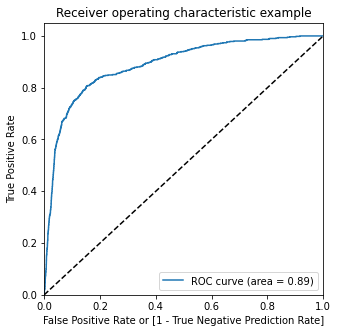

In [137]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

# Decision Tree

In [138]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_smt,y_train_smt)

DecisionTreeClassifier(max_depth=5)

In [140]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# Making predictions
y_pred_default = dt_default.predict(X_test)



In [141]:
# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      6891
           1       0.40      0.70      0.51       610

    accuracy                           0.89      7501
   macro avg       0.69      0.81      0.73      7501
weighted avg       0.93      0.89      0.90      7501



In [142]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_default))
print ('F1 score: ', f1_score(y_test, y_pred_default))
print ('Recall: ', recall_score(y_test, y_pred_default))
print ('Precision: ', precision_score(y_test, y_pred_default))

print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_default))

Accuracy:  0.8913478202906279
F1 score:  0.5134328358208955
Recall:  0.7049180327868853
Precision:  0.40375586854460094

 confussion matrix:
 [[6256  635]
 [ 180  430]]


In [143]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train_smt,y_train_smt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [144]:

scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.324339,0.025773,0.006801,0.000981,1,{'max_depth': 1},0.769473,0.815554,0.816884,0.806580,0.821459,0.805990,0.018885,39,0.815029,0.803508,0.803357,0.805751,0.802032,0.805935,0.004701
1,0.580004,0.013843,0.006400,0.001021,2,{'max_depth': 2},0.824504,0.840832,0.848815,0.840208,0.851337,0.841139,0.009387,38,0.848322,0.840943,0.838645,0.840767,0.844758,0.842687,0.003438
2,0.833654,0.013184,0.006827,0.001173,3,{'max_depth': 3},0.835389,0.872158,0.868408,0.864643,0.877344,0.863588,0.014712,37,0.874418,0.864016,0.864893,0.865985,0.861752,0.866213,0.004332
3,1.125320,0.058097,0.007129,0.001779,4,{'max_depth': 4},0.848694,0.883285,0.885583,0.881577,0.887746,0.877377,0.014492,36,0.889689,0.876081,0.877593,0.874271,0.875268,0.878580,0.005660
4,1.347134,0.015579,0.006001,0.001096,5,{'max_depth': 5},0.849661,0.891993,0.893687,0.885690,0.899480,0.884102,0.017772,35,0.896220,0.887904,0.886060,0.886124,0.885821,0.888426,0.003967


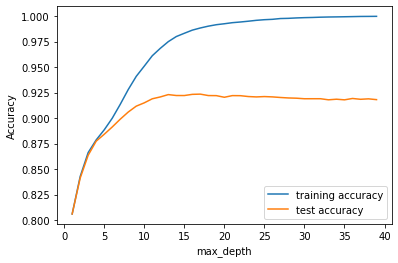

In [145]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 4, after which the test score gradually reduces. Note that the scores are average accuracies across the 5-folds.

Now we will tune Minimum samples leaf.

In [146]:
# GridSearchCV to find optimal min_samples_leafe
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train_smt,y_train_smt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [147]:

# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.390853,0.178997,0.008402,0.002334,5,{'min_samples_leaf': 5},0.869860,0.928882,0.926101,0.930204,0.920165,0.915042,0.022854,1,0.977533,0.971122,0.971152,0.970790,0.970246,0.972168,0.002702
1,4.242213,0.129689,0.006939,0.001211,25,{'min_samples_leaf': 25},0.869618,0.915820,0.919448,0.911092,0.915084,0.906213,0.018489,2,0.941458,0.929846,0.930118,0.930301,0.928306,0.932006,0.004778
2,3.851704,0.192260,0.009319,0.001098,45,{'min_samples_leaf': 45},0.866715,0.910498,0.909894,0.907584,0.913149,0.901568,0.017516,3,0.929241,0.916541,0.916904,0.917722,0.913882,0.918858,0.005349
3,3.579316,0.204245,0.007051,0.001228,65,{'min_samples_leaf': 65},0.859216,0.907475,0.908805,0.906980,0.910608,0.898617,0.019740,4,0.920956,0.909616,0.909797,0.909800,0.908772,0.911788,0.004599
4,3.377665,0.144860,0.008691,0.000895,85,{'min_samples_leaf': 85},0.859942,0.909773,0.903846,0.898512,0.906133,0.895641,0.018220,5,0.916964,0.904082,0.902963,0.904629,0.901454,0.906019,0.005579


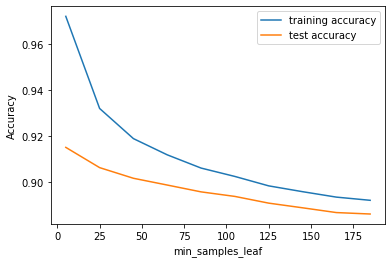

In [148]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see that at values > 125, the test and train score starts to converge and hence the model starts becoming more stable

Now we will tune min_samples_split

In [149]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train_smt,y_train_smt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [150]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.133891,0.130880,0.009443,0.000988,5,{'min_samples_split': 5},0.873125,0.929608,0.932874,0.929963,0.927301,0.918574,0.022793,1,0.996976,0.995494,0.995464,0.995404,0.994920,0.995652,0.000694
1,6.197272,0.194921,0.008294,0.001393,25,{'min_samples_split': 25},0.863933,0.925496,0.925254,0.925124,0.923431,0.912648,0.024368,2,0.978500,0.970547,0.971213,0.969188,0.967736,0.971437,0.003728
2,6.303209,0.339215,0.007958,0.002350,45,{'min_samples_split': 45},0.859579,0.919448,0.925012,0.916899,0.920044,0.908196,0.024450,3,0.964953,0.955791,0.955246,0.954099,0.954220,0.956862,0.004095
3,6.173829,0.185475,0.009190,0.000776,65,{'min_samples_split': 65},0.857039,0.918602,0.926101,0.911697,0.914842,0.905656,0.024779,4,0.955216,0.947475,0.946356,0.944785,0.944906,0.947748,0.003864
4,6.006562,0.188252,0.009498,0.001177,85,{'min_samples_split': 85},0.858853,0.915336,0.923682,0.913270,0.913633,0.904955,0.023359,5,0.949652,0.940671,0.941881,0.939766,0.937800,0.941954,0.004073


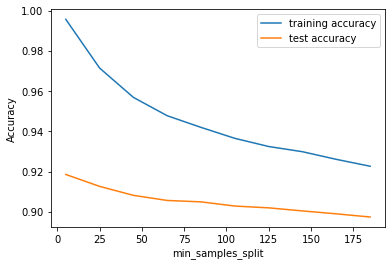

In [151]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

* We notice that with values > 125, the train and test accuracy start to converge hence making the model more stable and less complex.


### Running the grid search to find the optimal hyper parameters

In [152]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.5min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [153]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.971771,0.058240,0.005976,0.001835,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.943556,0.939556,0.942889,0.937778,0.941333,0.941022,0.002130,8
1,0.937619,0.016858,0.005080,0.000992,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.943556,0.939556,0.942889,0.937778,0.941333,0.941022,0.002130,8
2,0.916599,0.012410,0.005530,0.000862,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.945778,0.939556,0.943556,0.938667,0.940667,0.941644,0.002643,3
3,0.934923,0.017166,0.006373,0.002112,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.945778,0.939556,0.943556,0.938667,0.940667,0.941644,0.002643,3
4,1.594747,0.071411,0.005192,0.001946,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.944222,0.941556,0.941556,0.933111,0.941111,0.940311,0.003765,13
5,1.728379,0.079574,0.008601,0.005606,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.944222,0.941556,0.941778,0.933111,0.940222,0.940178,0.003762,14
6,1.456844,0.024075,0.006780,0.001015,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.944000,0.940444,0.943556,0.938444,0.941778,0.941644,0.002044,5
7,1.494445,0.023213,0.005151,0.001632,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.944000,0.940444,0.943556,0.938444,0.941778,0.941644,0.002044,5
8,0.695513,0.019464,0.005012,0.000650,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.943556,0.939778,0.944444,0.934222,0.941778,0.940756,0.003637,12
9,0.690129,0.013849,0.005436,0.000588,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.943556,0.939778,0.944444,0.934222,0.942667,0.940933,0.003704,11


In [154]:
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Best Accuracy 0.9420000000000002
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


### Running the model with the best parameters

In [155]:

# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
clf_gini.fit(X_train_smt,y_train_smt)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

In [156]:
y_pred = clf_gini.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      6891
           1       0.38      0.76      0.51       610

    accuracy                           0.88      7501
   macro avg       0.68      0.82      0.72      7501
weighted avg       0.93      0.88      0.90      7501



In [157]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))

print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.8794827356352486
F1 score:  0.5060109289617486
Recall:  0.759016393442623
Precision:  0.3795081967213115

 confussion matrix:
 [[6134  757]
 [ 147  463]]


## Random Forest

In [158]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with 13 trees
rfc = RandomForestClassifier(random_state=42, n_estimators=20, oob_score=True)
rfc.fit(X_train_smt,y_train_smt)

RandomForestClassifier(n_estimators=20, oob_score=True, random_state=42)

In [159]:
# Making predictions
predictions = rfc.predict(X_test)


In [160]:
# Importing classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      6891
           1       0.57      0.64      0.61       610

    accuracy                           0.93      7501
   macro avg       0.77      0.80      0.78      7501
weighted avg       0.94      0.93      0.93      7501



In [161]:
print ('Accuracy: ', accuracy_score(y_test, predictions))
print ('F1 score: ', f1_score(y_test, predictions))
print ('Recall: ', recall_score(y_test, predictions))
print ('Precision: ', precision_score(y_test, predictions))

print ('\n confussion matrix:\n',confusion_matrix(y_test, predictions))

Accuracy:  0.9321423810158646
F1 score:  0.60573199070488
Recall:  0.6409836065573771
Precision:  0.5741556534508077

 confussion matrix:
 [[6601  290]
 [ 219  391]]


In [162]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,12,16,20],
    'min_samples_leaf': range(10, 20, 30),
    'min_samples_split': range(10, 30, 50),
    'n_estimators': [5,10,15,20], 
    'max_features': [5, 10, 15]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [163]:
# Fit the grid search to the data
grid_search.fit(X_train_smt,y_train_smt)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.1min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 12, 16, 20],
                         'max_features': [5, 10, 15],
                         'min_samples_leaf': range(10, 20, 30),
                         'min_samples_split': range(10, 30, 50),
                         'n_estimators': [5, 10, 15, 20]},
             verbose=1)

In [164]:
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)
print(grid_search.best_params_)

Best Accuracy 0.9380477566371606
{'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 20}


In [165]:
# Fitting the best model

# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=10, 
                             min_samples_split=10,
                             max_features=10,
                             n_estimators=20)

In [166]:
# fit
rfc.fit(X_train_smt,y_train_smt)

RandomForestClassifier(max_depth=20, max_features=10, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=20)

In [167]:
# predict
predictions = rfc.predict(X_test)

In [168]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      6891
           1       0.52      0.71      0.60       610

    accuracy                           0.92      7501
   macro avg       0.75      0.83      0.78      7501
weighted avg       0.94      0.92      0.93      7501



In [169]:
print ('Accuracy: ', accuracy_score(y_test, predictions))
print ('F1 score: ', f1_score(y_test, predictions))
print ('Recall: ', recall_score(y_test, predictions))
print ('Precision: ', precision_score(y_test, predictions))

print ('\n confussion matrix:\n',confusion_matrix(y_test, predictions))

Accuracy:  0.9229436075189975
F1 score:  0.5997229916897507
Recall:  0.7098360655737705
Precision:  0.5191846522781774

 confussion matrix:
 [[6490  401]
 [ 177  433]]


## Conclusion and Recommendations

#### We ran the following model and have summarized  the findings:
- Logistic Regression Model with RFE and VIF
- Decision Tree model
- Random Forest Model

### Logistic Regression
    - Sensitivity =  0.8065573770491803
    - Specificity =  0.8457408213611958
    - False Positive Rate =  0.15425917863880423
    - Precision =  0.3163987138263666
    - True Negative Prediction Rate =  0.9801547258661285
### Decision Tree
    - Accuracy:  0.8794827356352486
    - F1 score:  0.5060109289617486
    - Recall:  0.759016393442623
    - Precision:  0.3795081967213115
### Random Forest
    - Accuracy:  0.9229436075189975
    - F1 score:  0.5997229916897507
    - Recall:  0.7098360655737705
    - Precision:  0.5191846522781774

* Considering the precision and Recall/sensitivity - all the models seems to have similar tradeoffs. But considering both the metrics, we can go with Random Forest method. 


### Recommendations

* `arpu_goodphase`, `std_ic_mou_6` i.e. average revenu per user in the goodphase and std incoming calls in the 6th month has high positive impacts on the churn.

* `total_ic_mou_8`, `total_rech_data_8`, `last_day_rch_amt_8` impacts negatively on the churn rate. 

* The reductions in outgoing calls for the high value customers in the month of August can be one symbol for churn in the upcoming months.
* The month eight acitivities are to be taken note off for the high value customers. If the average revenu per user, usage of data (3g, 2g) and call facilities reduces, the company can offers to such users to reduce churn rate. 